<a href="https://colab.research.google.com/github/Lastknight78/Alabi/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("newly compiled data.csv.csv")

In [ ]:
df.head()

,Month,Year,Narrow Money (M1),year,month,c_exchange_rate_unofficial,Date,Price,Open,High,Low,Change %,years,month.1,Month-on change (%),Year-on change (%)
0,1.0,2014.0,6782016.15,2014,1,157.29,1/2/2014,41228.49,41329.19,41505.77,41162.99,-0.24%,2014.0,1.0,0.64,8.0
1,2.0,2014.0,6739403.75,2014,2,157.31,1/3/2014,41450.48,41228.49,41522.17,41064.69,0.54%,2014.0,2.0,0.50,7.7
2,3.0,2014.0,7617909.51,2014,3,157.30,1/6/2014,41507.30,41450.48,41513.95,41240.18,0.14%,2014.0,3.0,0.78,7.8
3,4.0,2014.0,7677107.83,2014,4,157.29,1/7/2014,41806.73,41507.30,41834.87,41240.51,0.72%,2014.0,4.0,0.62,7.9
4,5.0,2014.0,7348680.91,2014,5,157.29,1/8/2014,41830.89,41806.73,42258.64,41666.08,0.06%,2014.0,5.0,0.78,8.0


In [ ]:
df.columns

Index(['Month', 'Year', 'Narrow Money (M1)', 'year', 'month',
       'c_exchange_rate_unofficial', 'Date', 'Price', 'Open', 'High', 'Low',
       'Change %', 'years', 'month.1', 'Month-on change (%)',
       'Year-on change (%)', 'PRICE'],
      dtype='object')

In [ ]:
data =df[['month','Narrow Money (M1)','c_exchange_rate_unofficial','Price', 'High', 'Low','Year-on change (%)']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   month                       127 non-null    int64  
 1   Narrow Money (M1)           125 non-null    float64
 2   c_exchange_rate_unofficial  127 non-null    float64
 3   Price                       127 non-null    float64
 4   High                        127 non-null    float64
 5   Low                         127 non-null    float64
 6   Year-on change (%)          126 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 7.1 KB


In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   month                       125 non-null    int64  
 1   Narrow Money (M1)           125 non-null    float64
 2   c_exchange_rate_unofficial  125 non-null    float64
 3   Price                       125 non-null    float64
 4   High                        125 non-null    float64
 5   Low                         125 non-null    float64
 6   Year-on change (%)          125 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 7.8 KB


In [ ]:
data['stock_market_price'] = (data['High'] + data['Low'])/2

In [ ]:
data.rename(columns = {'Year-on change (%)':'inflation rate'},inplace = True)

In [ ]:
data.head()

,Narrow Money (M1),c_exchange_rate_unofficial,Price,High,Low,inflation rate,PRICE
0,6782016.15,157.29,41228.49,41505.77,41162.99,8.0,41334.380
1,6739403.75,157.31,41450.48,41522.17,41064.69,7.7,41293.430
2,7617909.51,157.30,41507.30,41513.95,41240.18,7.8,41377.065
3,7677107.83,157.29,41806.73,41834.87,41240.51,7.9,41537.690
4,7348680.91,157.29,41830.89,42258.64,41666.08,8.0,41962.360


In [ ]:
data.head()

,Date,Narrow Money (M1),c_exchange_rate_unofficial,Price,High,Low,inflation rate,stock_market_price
0,1/2/2014,6782016.15,157.29,41228.49,41505.77,41162.99,8.0,41334.380
1,1/3/2014,6739403.75,157.31,41450.48,41522.17,41064.69,7.7,41293.430
2,1/6/2014,7617909.51,157.30,41507.30,41513.95,41240.18,7.8,41377.065
3,1/7/2014,7677107.83,157.29,41806.73,41834.87,41240.51,7.9,41537.690
4,1/8/2014,7348680.91,157.29,41830.89,42258.64,41666.08,8.0,41962.360


In [ ]:
data = data.drop(columns = ['Price','High','Low'],axis = 1)

In [ ]:
data.head()

,month,Narrow Money (M1),c_exchange_rate_unofficial,inflation rate,stock_market_price
0,1,6782016.15,157.29,8.0,41334.380
1,2,6739403.75,157.31,7.7,41293.430
2,3,7617909.51,157.30,7.8,41377.065
3,4,7677107.83,157.29,7.9,41537.690
4,5,7348680.91,157.29,8.0,41962.360


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#correlation of the features
data.drop(columns='month',axis = 1).corr()

,Narrow Money (M1),c_exchange_rate_unofficial,inflation rate,stock_market_price,Productivity
Narrow Money (M1),1.000000,0.892515,0.914460,0.319928,-0.705760
c_exchange_rate_unofficial,0.892515,1.000000,0.879161,0.294596,-0.604374
inflation rate,0.914460,0.879161,1.000000,0.270020,-0.766820
stock_market_price,0.319928,0.294596,0.270020,1.000000,0.315098
Productivity,-0.705760,-0.604374,-0.766820,0.315098,1.000000


<Axes: >

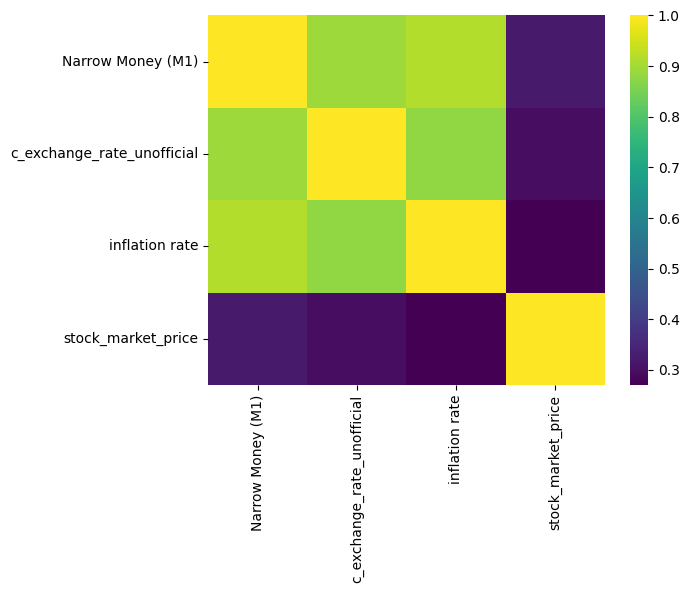

In [ ]:
# Heatmap of the correlation
sns.heatmap(data.drop(columns='month',axis = 1).corr(), cmap='viridis')

In [ ]:
data['Productivity'] = data['stock_market_price'] / (data['inflation rate'] * data['c_exchange_rate_unofficial'])

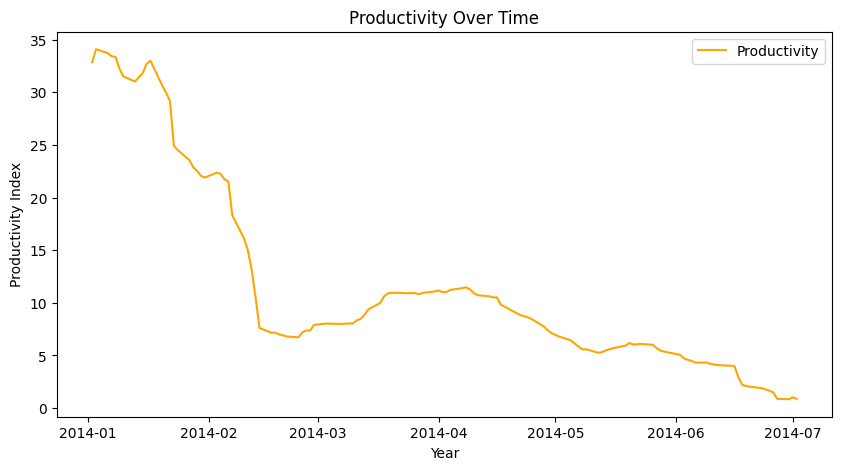

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data['Productivity'], label='Productivity', color='orange')
plt.title('Productivity Over Time')
plt.xlabel('Year')
plt.ylabel('Productivity Index')
plt.legend()
plt.show()

In [ ]:
len(data)

125

In [ ]:
start_date = '2014-01'
date_range = pd.date_range(start=start_date, periods=125, freq='MS')

# Convert to DataFrame with Year and Month only
dates_df = pd.DataFrame(date_range.strftime('%Y-%m'), columns=['Date'])


In [ ]:
dates_df.head()

,Date
0,2014-01
1,2014-02
2,2014-03
3,2014-04
4,2014-05


In [ ]:
data2 = pd.concat([dates_df, data], axis=1)

In [ ]:
data2.head()

,Date,month,Narrow Money (M1),c_exchange_rate_unofficial,inflation rate,stock_market_price,Productivity
0,2014-01,1,6782016.15,157.29,8.0,41334.380,32.848862
1,2014-02,2,6739403.75,157.31,7.7,41293.430,34.090542
2,2014-03,3,7617909.51,157.30,7.8,41377.065,33.723788
3,2014-04,4,7677107.83,157.29,7.9,41537.690,33.428288
4,2014-05,5,7348680.91,157.29,8.0,41962.360,33.347924


In [ ]:
data2 = data2.set_index('Date')

In [ ]:
data2 = data2.drop(columns = ['index','month'],axis = 1)

In [ ]:
data2.head()

,Narrow Money (M1),c_exchange_rate_unofficial,inflation rate,stock_market_price,Productivity
Date,,,,,
2014-01,6782016.15,157.29,8.0,41334.380,32.848862
2014-02,6739403.75,157.31,7.7,41293.430,34.090542
2014-03,7617909.51,157.30,7.8,41377.065,33.723788
2014-04,7677107.83,157.29,7.9,41537.690,33.428288
2014-05,7348680.91,157.29,8.0,41962.360,33.347924


In [ ]:
len(data2)

125

In [ ]:
data2 = data2.reset_index()
data2['Date'] = pd.to_datetime(data2['Date'])


In [ ]:
data2 = data2.set_index('Date')

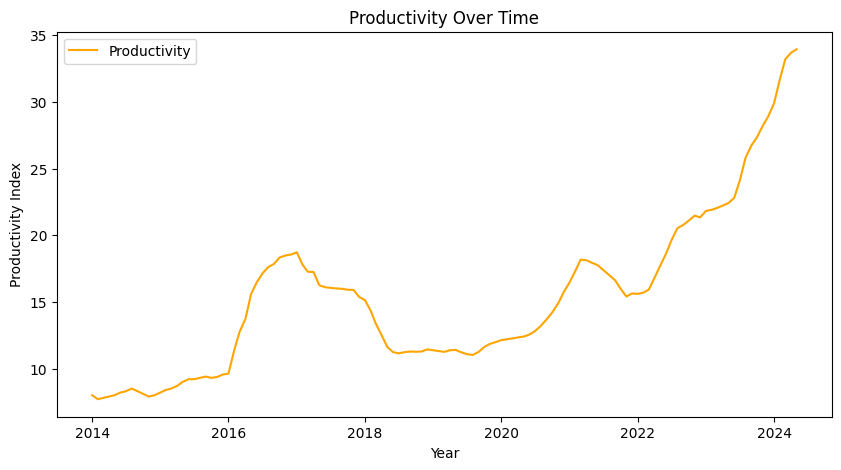

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data2['inflation rate'], label='Productivity', color='orange')
plt.title('Productivity Over Time')
plt.xlabel('Year')
plt.ylabel('Productivity Index')
plt.legend()
plt.show()

In [ ]:
data2 = data2.drop(columns = 'index',axis = 1)

In [ ]:
data2.columns

Index(['Narrow Money (M1)', 'c_exchange_rate_unofficial', 'inflation rate',
       'stock_market_price', 'Productivity'],
      dtype='object')

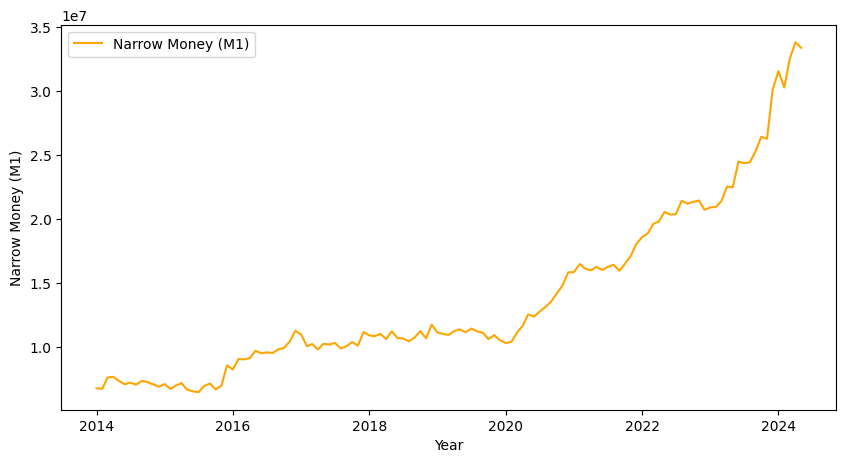

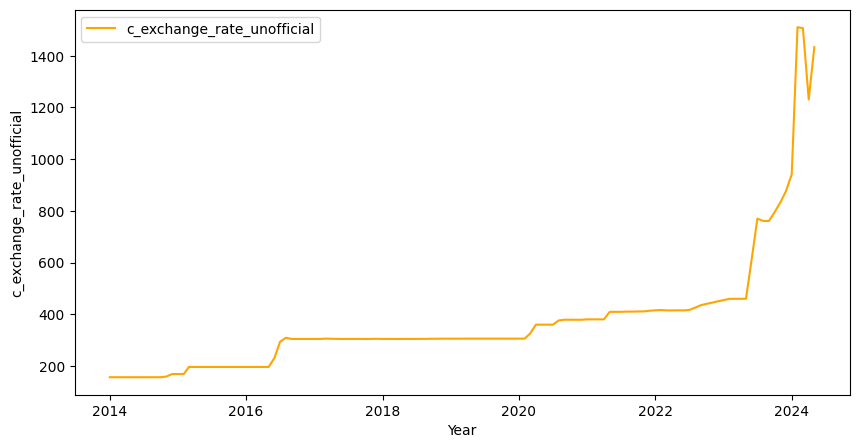

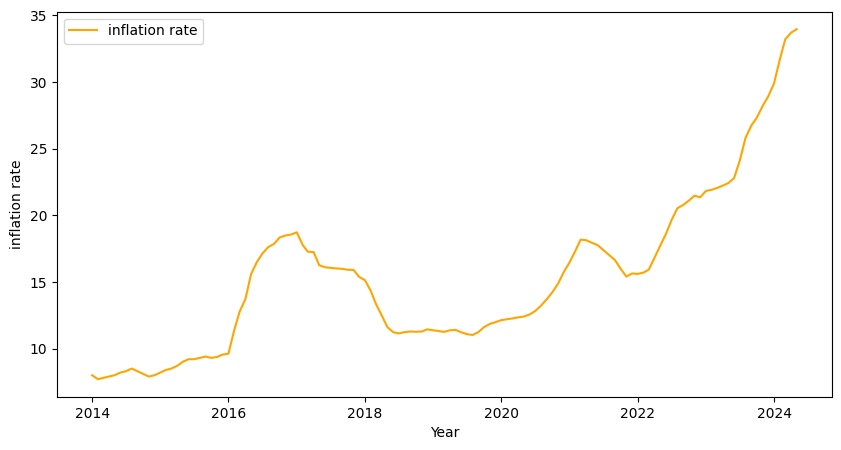

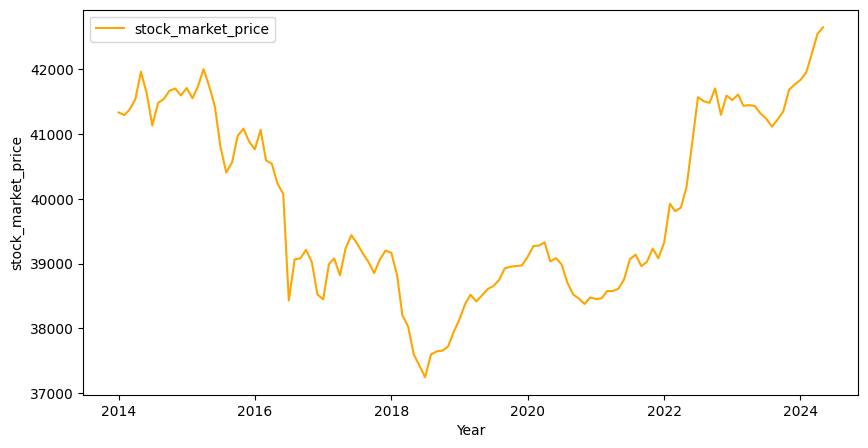

In [ ]:
for i in data2.drop(columns = 'Productivity', axis=1).columns:
  plt.figure(figsize=(10, 5))
  plt.plot(data2[i], label = i, color = 'orange')
  plt.xlabel('Year')
  plt.ylabel(i)
  plt.legend()
  plt.show()